In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

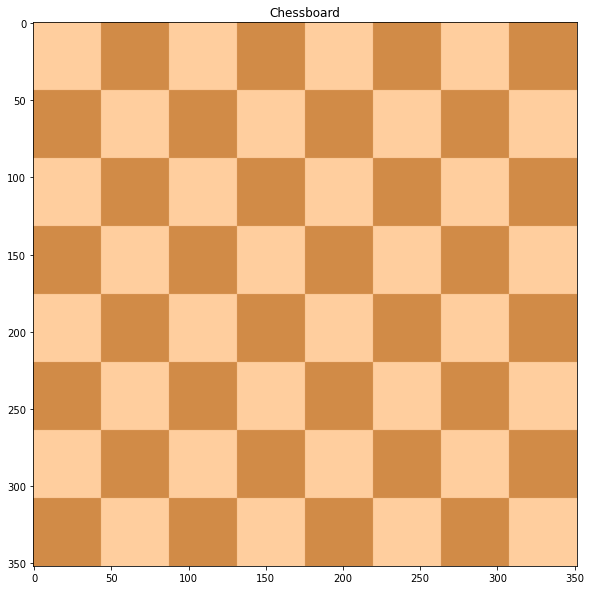

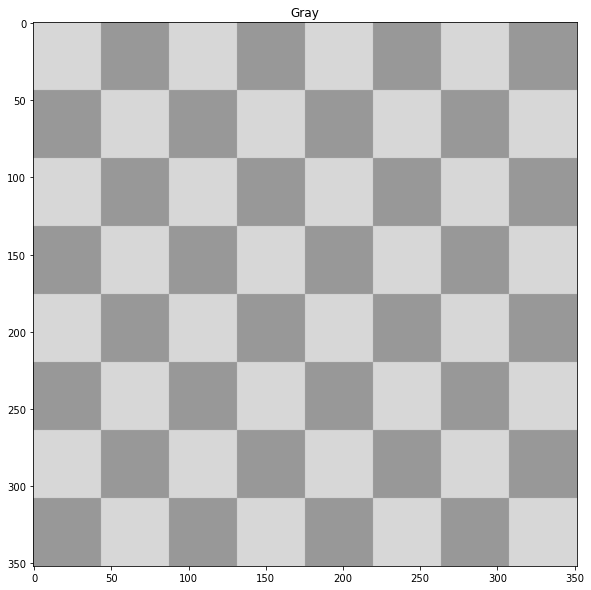

In [33]:
img = cv2.imread("images/flat_chessboard.png")
imshow("Chessboard", img)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imshow("Gray", gray)

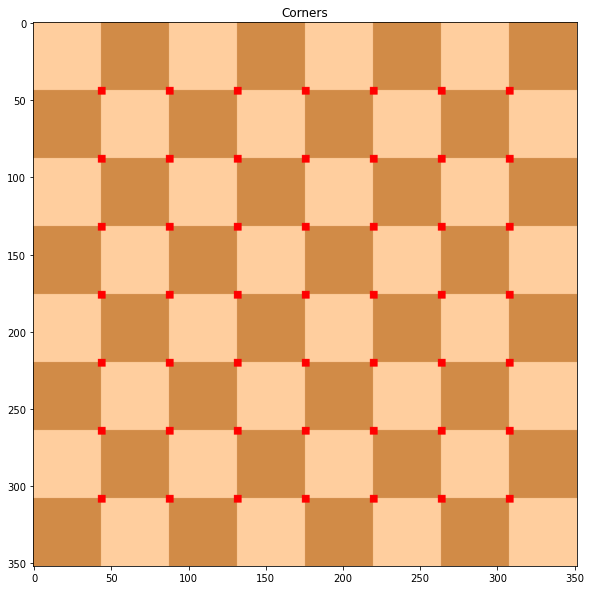

In [28]:
# float values for corner harris detection
grayf  = np.float32(gray)
dst = cv2.cornerHarris(grayf,2,3,0.04)
dst = cv2.dilate(dst, None)
img[dst > 0.01*dst.max()] = [0,0,255] # if greater than 1% of max val then it is a corner
imshow("Corners", img)


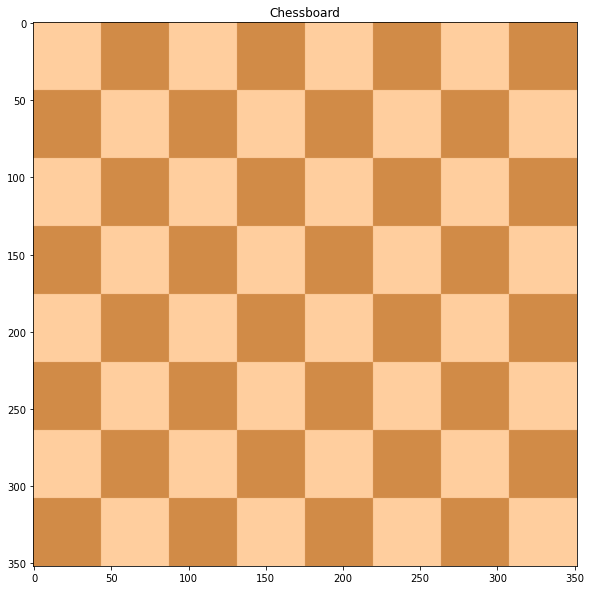

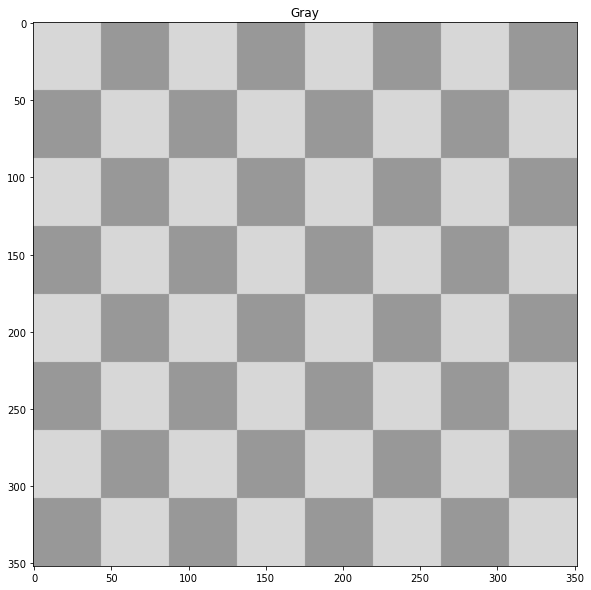

In [36]:
img = cv2.imread("images/flat_chessboard.png")
imshow("Chessboard", img)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imshow("Gray", gray)

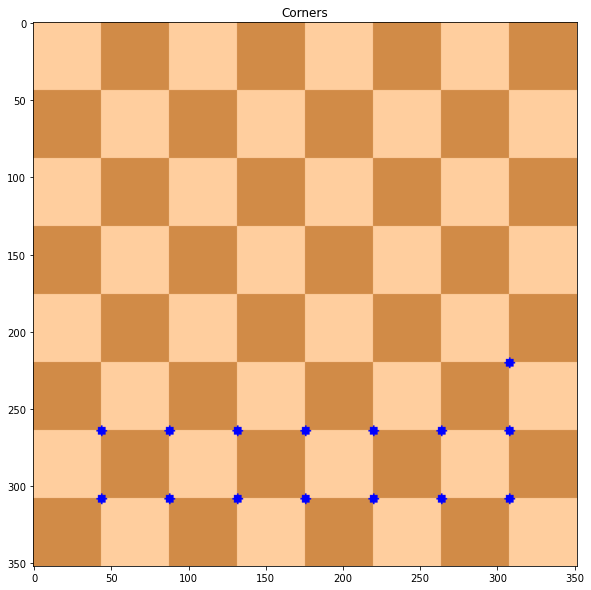

In [42]:
# Shi Thomasi corner Detection
# second arg = how many corners to detect,
corners = cv2.goodFeaturesToTrack(gray, 15, 0.01, 10)

# make them int
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel() # Flatten out 
    cv2.circle(img,(x,y),3, (255,0,0), -1)

imshow("Corners", img)